In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from prophet import Prophet
from prophet.plot import plot_plotly
%matplotlib inline

# Set the style to use
sns.set_style("dark")

# Set the color palette to use
colors = ["#48A9A6", "#071010", "#000000"]
sns.set_palette(sns.color_palette(colors))


In [70]:
df = pd.read_csv('Time_series_analysis_and_forecast_DATASET (1).csv')


In [71]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [72]:
df.tail()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000
92015,2021-02-28 23:00:00,24.3,714.69630,5.4848,62.955


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [74]:
df['FullDate'] = pd.to_datetime(df['FullDate'], format='%Y-%m-%d')

In [75]:
df.isna().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [76]:
df.duplicated().sum()

0

In [77]:
df

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [78]:
df_copy = df.copy()

In [79]:
df_copy.set_index(df_copy['FullDate'], inplace=True)

In [80]:
avg_yr = df_copy[['Tmax', 'SysLoad', 'GasPrice', 'ElecPrice']].resample('M').mean()

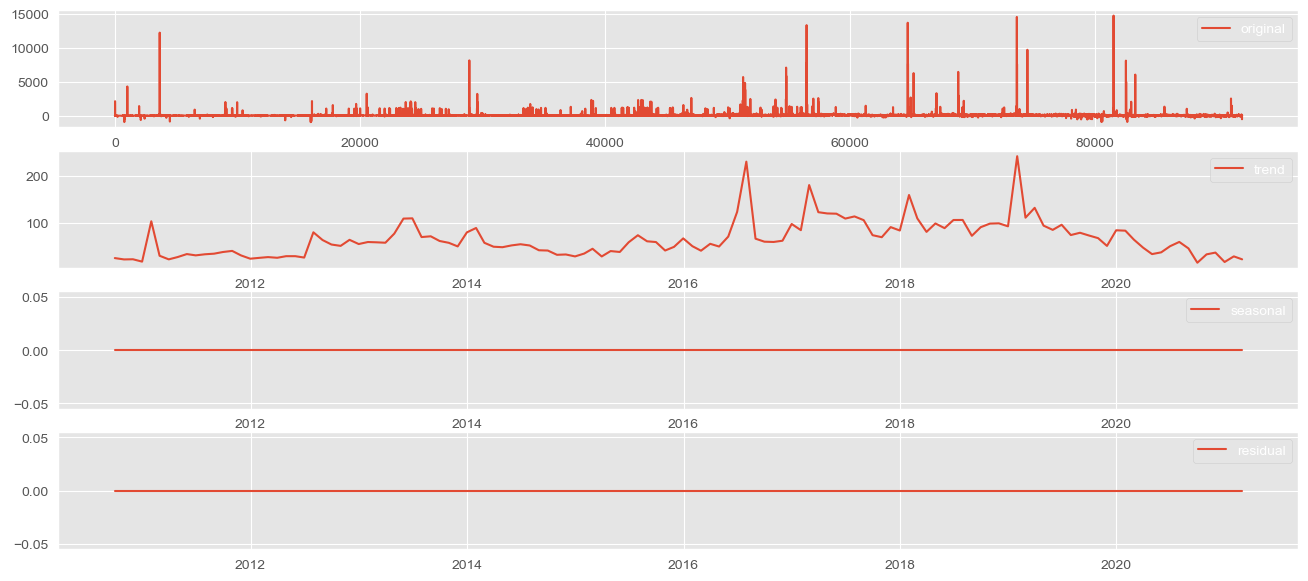

In [81]:
from statsmodels.tsa.seasonal import seasonal_decompose
dec = seasonal_decompose(avg_yr['ElecPrice'], period=1, model='additive')
trend = dec.trend
season = dec.seasonal
residual = dec.resid

plt.figure(figsize=(16,7))
plt.subplot(411)
plt.plot(df['ElecPrice'], label='original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(season, label='seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='residual')
plt.legend(loc='best')

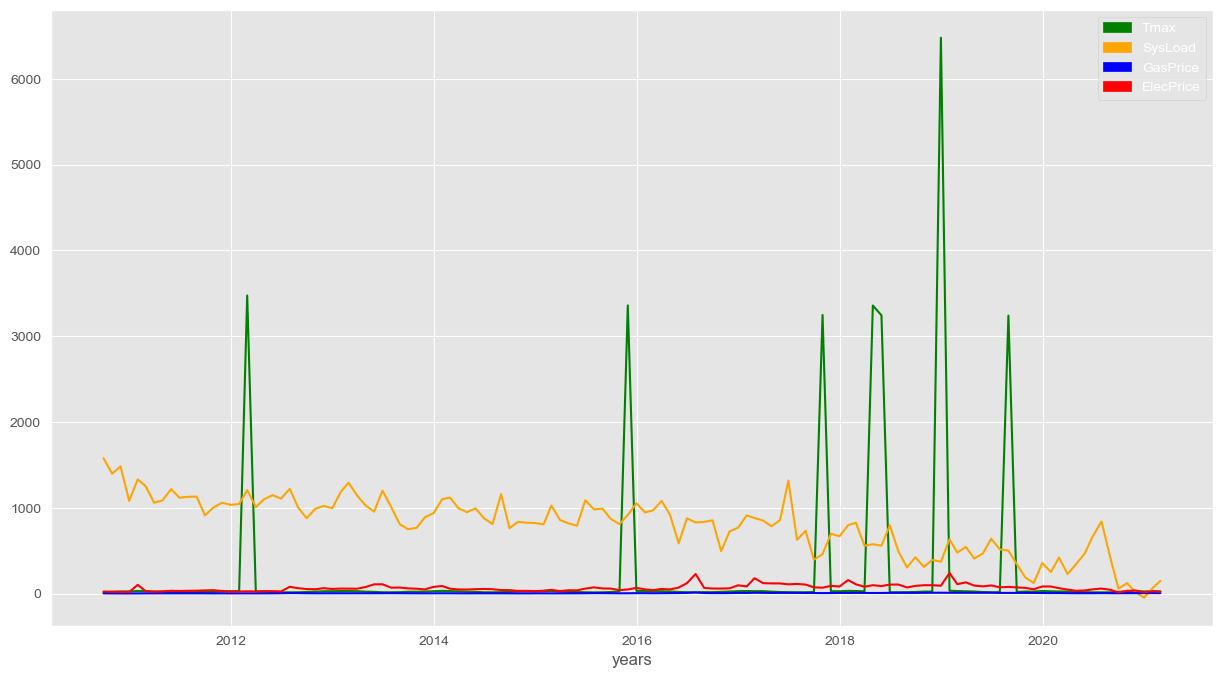

In [82]:
plt.figure(figsize=(15,8))
plt.xlabel('years')
plt.style.use('dark_background')
plt.plot(avg_yr.index, avg_yr['Tmax'], color='g')
plt.plot(avg_yr.index, avg_yr['SysLoad'], color='orange')
plt.plot(avg_yr.index, avg_yr['GasPrice'], color='b')
plt.plot(avg_yr.index, avg_yr['ElecPrice'], color='r')
plt.style.use('ggplot')

TM = mpatches.Patch(color='g', label='Tmax')
SL = mpatches.Patch(color='orange', label='SysLoad')
GS = mpatches.Patch(color='b', label='GasPrice')
EP = mpatches.Patch(color='r', label='ElecPrice')
plt.legend(handles=[TM, SL, GS, EP]);

In [84]:
avg_yr = df_copy[['ElecPrice']].resample('W').mean()

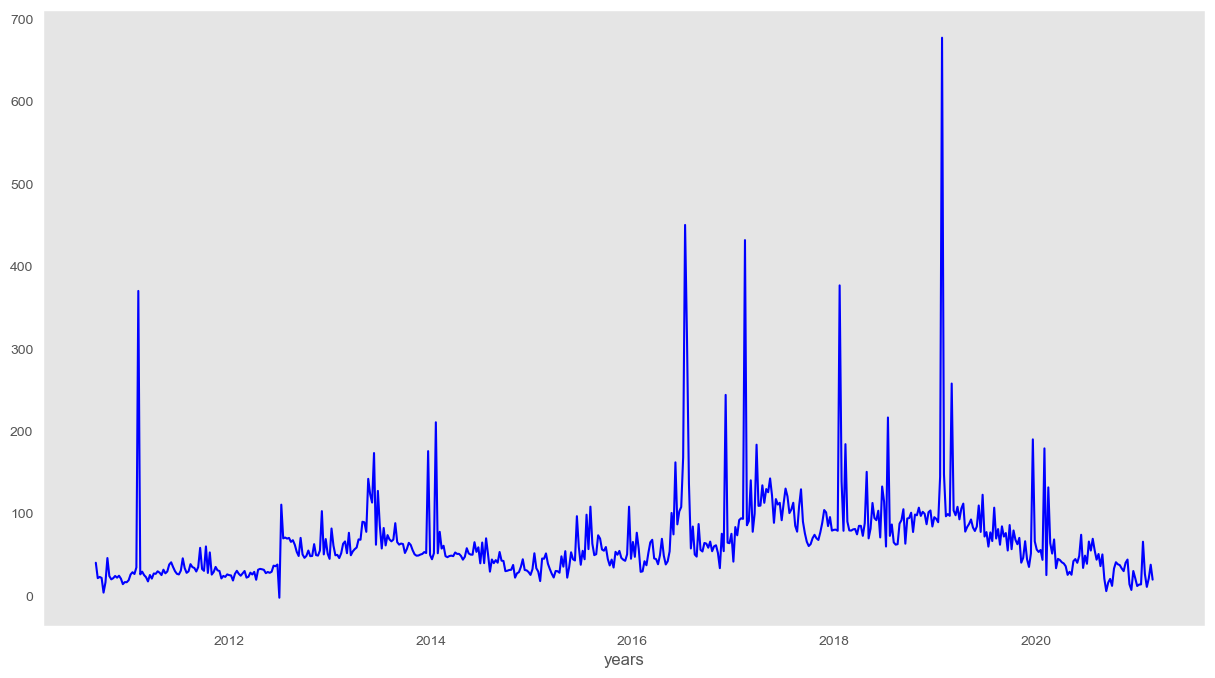

In [85]:
plt.figure(figsize=(15,8))
plt.xlabel('years')
plt.style.use('ggplot')
plt.style.use('dark_background')
plt.grid(visible=False)
plt.plot(avg_yr.index, avg_yr['ElecPrice'], color='b')

In [86]:
from statsmodels.tsa.stattools import adfuller
#function to check stationarity using Augmented Dickey fuller test 

ADF = adfuller(avg_yr['ElecPrice'], autolag='AIC')
print(f'ADF statistics for Electric Price is: {ADF[0]}')
print(f'p-Value: {ADF[1]}')
for key, value in ADF[4].items():
    print('critical values: ')
    print(f'    {key},  {value}')

ADF statistics for Electric Price is: -5.096948057166283
p-Value: 1.4218449622644363e-05
critical values: 
    1%,  -3.442472769145813
critical values: 
    5%,  -2.8668873212324817
critical values: 
    10%,  -2.5696179384812297


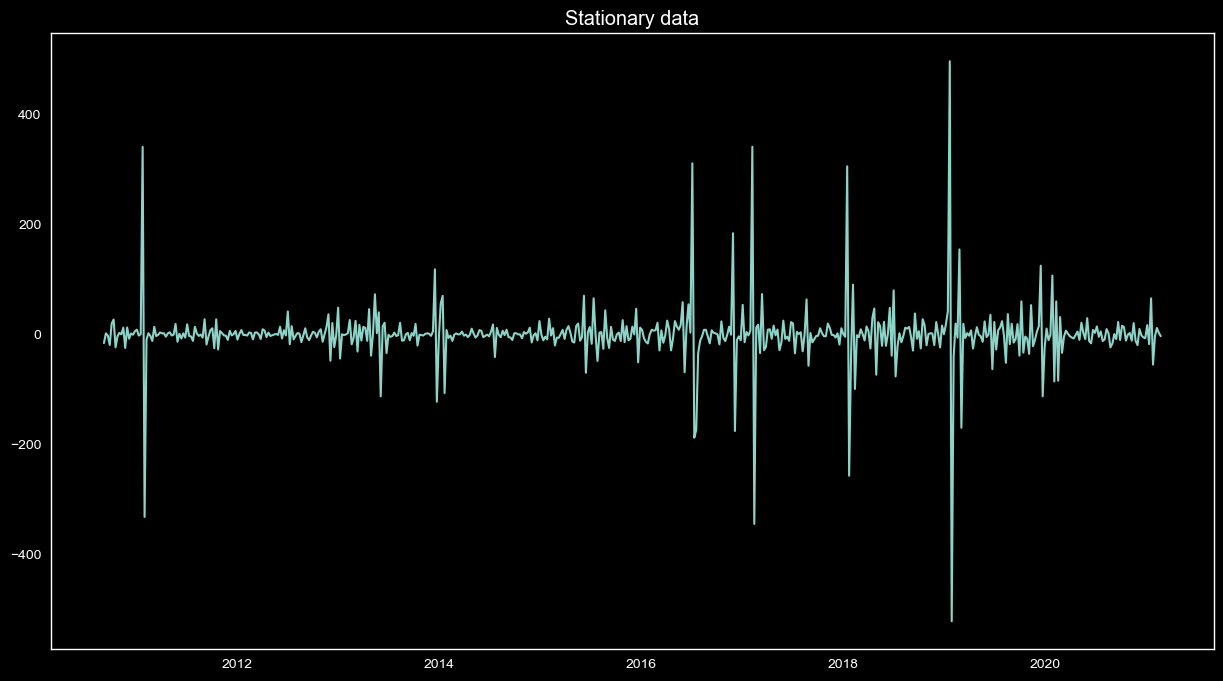

In [23]:
#differenceing
plt.style.use('dark_background')
dif = pd.DataFrame(avg_yr['ElecPrice'] - avg_yr['ElecPrice'].shift(1))
plt.figure(figsize=(15,8))
plt.title('Stationary data')
plt.plot(dif)
plt.grid(visible=False)
plt.style.use('ggplot')

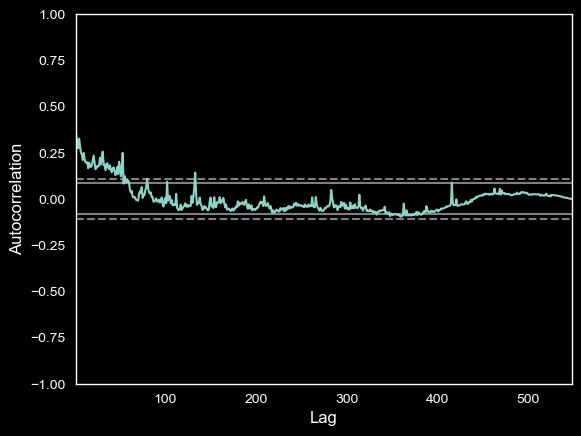

In [87]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(avg_yr['ElecPrice'])
plt.show()

In [88]:
avg_yr

,ElecPrice
FullDate,
2010-09-05,40.252625
2010-09-12,21.586905
2010-09-19,23.034405
2010-09-26,21.849940
2010-10-03,4.022173
...,...
2021-01-31,26.511548
2021-02-07,10.917113
2021-02-14,21.182530


In [90]:
train = avg_yr[avg_yr.index <= "2019-01-01"]
test = avg_yr[avg_yr.index >= "2019-01-01"]

In [91]:
train = train.reset_index()
test = test.reset_index()

In [92]:
train.columns = ['ds', 'y']
test.columns = ['ds', 'y']

In [93]:
train.head()

,ds,y
0,2010-09-05,40.252625
1,2010-09-12,21.586905
2,2010-09-19,23.034405
3,2010-09-26,21.849940
4,2010-10-03,4.022173


In [94]:
m = Prophet(interval_width=0.95)
m = m.fit(train)

09:24:45 - cmdstanpy - INFO - Chain [1] start processing
09:24:46 - cmdstanpy - INFO - Chain [1] done processing


In [95]:
forecast = m.predict(test)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-06,109.416847,26.844858,179.345641,109.416631,109.416913,-7.566917,-7.566917,-7.566917,-7.566917,-7.566917,-7.566917,0.0,0.0,0.0,101.849931
1,2019-01-13,109.646540,25.829900,202.132260,109.643781,109.648397,0.987135,0.987135,0.987135,0.987135,0.987135,0.987135,0.0,0.0,0.0,110.633676
2,2019-01-20,109.876233,33.366807,196.889662,109.868461,109.880408,10.298957,10.298957,10.298957,10.298957,10.298957,10.298957,0.0,0.0,0.0,120.175190
3,2019-01-27,110.105926,48.106928,208.076424,110.092983,110.113252,19.198456,19.198456,19.198456,19.198456,19.198456,19.198456,0.0,0.0,0.0,129.304382
4,2019-02-03,110.335619,51.137546,211.111803,110.317506,110.346526,25.444943,25.444943,25.444943,25.444943,25.444943,25.444943,0.0,0.0,0.0,135.780562


In [96]:
forecast[['ds', 'yhat']]  

,ds,yhat
0,2019-01-06,101.849931
1,2019-01-13,110.633676
2,2019-01-20,120.175190
3,2019-01-27,129.304382
4,2019-02-03,135.780562
...,...,...
108,2021-01-31,157.995838
109,2021-02-07,160.481559
110,2021-02-14,153.804431
111,2021-02-21,139.527082


In [97]:
future_dates = m.make_future_dataframe(periods=365)

In [98]:
future_dates

,ds
0,2010-09-05
1,2010-09-12
2,2010-09-19
3,2010-09-26
4,2010-10-03
...,...
795,2019-12-26
796,2019-12-27
797,2019-12-28
798,2019-12-29


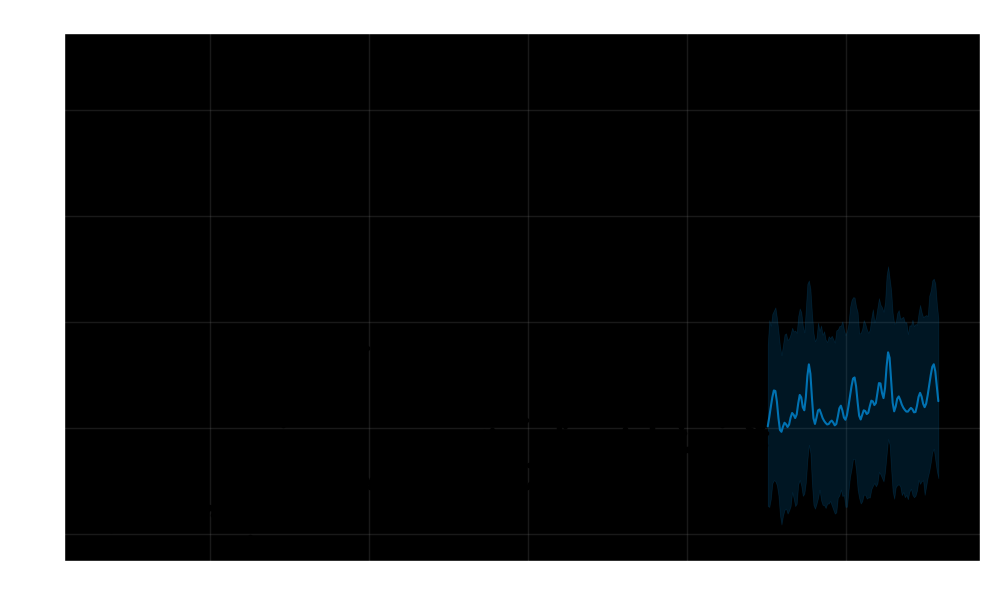

In [99]:
# Plot the actual and predicted values
fig = m.plot(forecast)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Date')
plt.ylabel('Value')

plt.show()



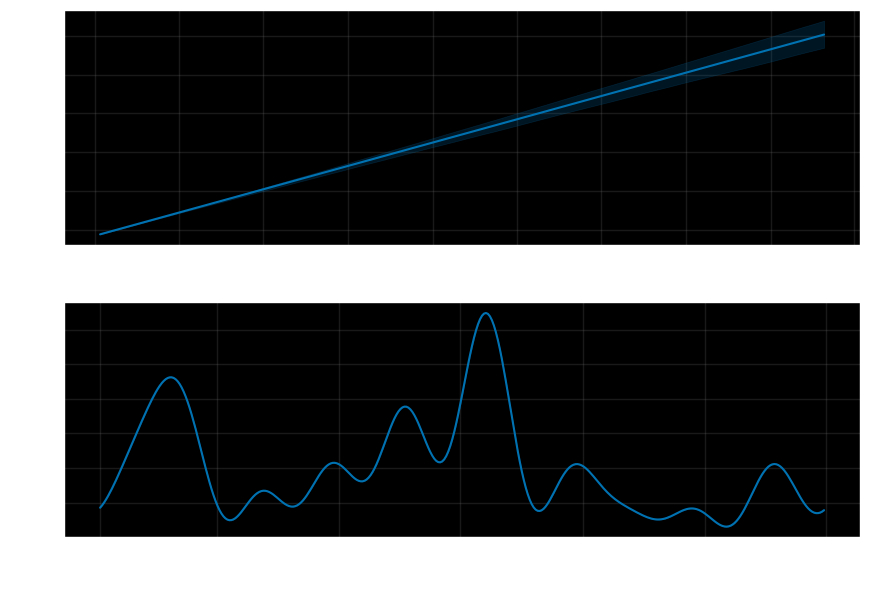

In [100]:
# Plot the forecast components

fig = m.plot_components(forecast)
plt.style.use('ggplot')
plt.show()


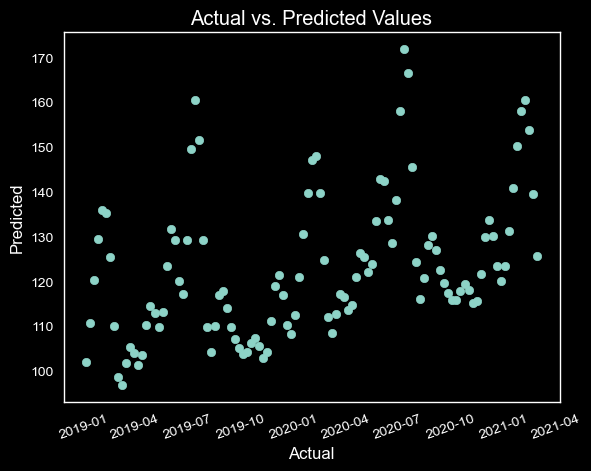

In [101]:
# Create a scatterplot of actual vs. predicted values
plt.style.use('dark_background')
plt.scatter(forecast['ds'], forecast['yhat'])
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.style.use('ggplot')
plt.xticks(rotation=20)
plt.grid(visible=False)
plt.show()


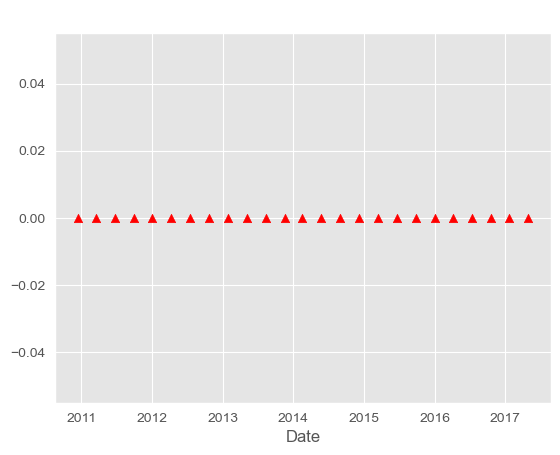

In [102]:
# Get the changepoints
changepoints = m.changepoints

# Plot the changepoints
plt.scatter(changepoints, [0]*len(changepoints), marker='^', color='r')
plt.title('Changepoints')
plt.xlabel('Date')
plt.show()


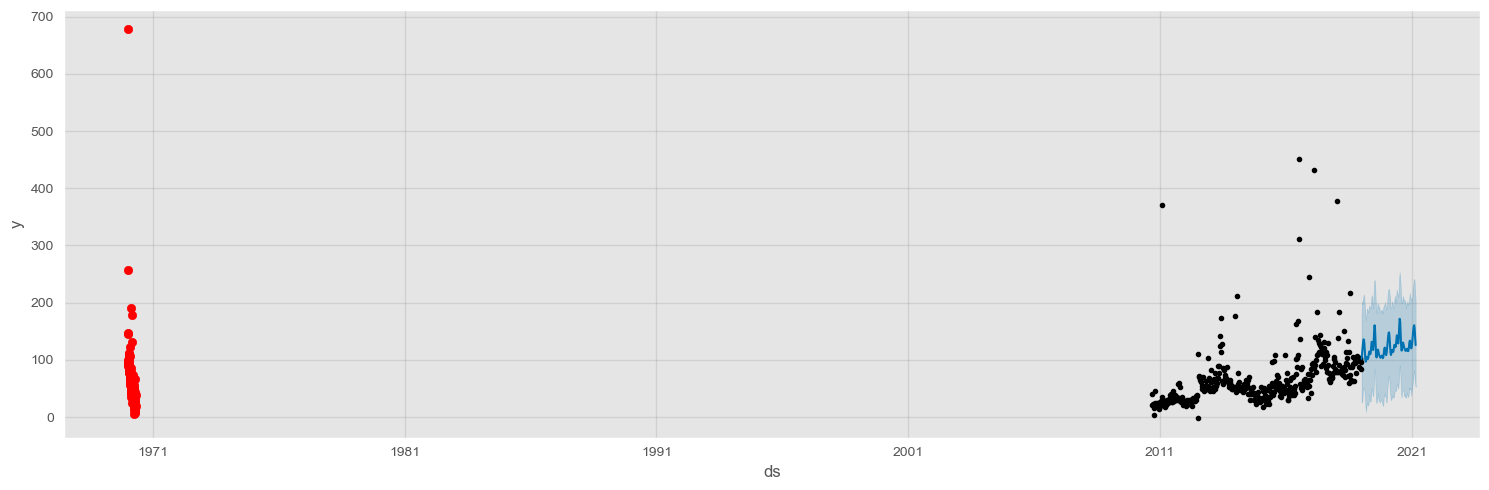

In [103]:
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(test.index, test['y'], color='r')
fig = m.plot(forecast, ax=ax)

In [104]:
from sklearn.metrics import mean_absolute_error
#mean absolute errorS
mae = mean_absolute_error(test['y'], forecast['yhat'])
print(mae)

70.8170458618495


In [105]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test['y'], forecast['yhat'])
print(mape)


223.1740025138592


In [106]:
#root mean squared error
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['y'], forecast['yhat']))
print(rmse)

91.5074165305975


In [107]:
#r-squared
from sklearn.metrics import r2_score
r2 = r2_score(test['y'], forecast['yhat'])
print(r2)

-0.7275667599946598
